## Part 1 : Without Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [2]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    return X, t

In [3]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))
    ### WRITE YOUR CODE HERE - 2 MARKS
    t_1hot = np.zeros((len(t_indices), N))
    for i in range(len(t_indices)) : t_1hot[i, t_indices[i]]=1
    return t_1hot

In [4]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

Test passed 👍


In [5]:
def splitData(X, t, testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    N = len(t)
#     rand_indices = np.array([k for k in range(N)])
#     np.random.shuffle(rand_indices)
    rand_indices = np.random.permutation(len(t))
#     print(rand_indices)
    M = int(N*(1-testFraction))
    # Train Random
    train_rand_indices = rand_indices[:M]
    X_train = X[train_rand_indices]
    t_train = t[train_rand_indices]
    # Test Random
    test_rand_indices = rand_indices[M:]
    X_test = X[test_rand_indices]
    t_test = t[test_rand_indices]
    return X_train, t_train, X_test, t_test

In [6]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [7]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    X_train_normalized = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
    X_test_normalized = (X_test - X_train.mean(axis=0))/X_train.std(axis=0)
    return X_train_normalized, X_test_normalized

In [8]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    # normalize with train mean and variance
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3., 3., 3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [9]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    y = 1/(1+np.exp(-x))
    return y

In [10]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

Test passed 👍


In [11]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    ### WRITE YOUR CODE HERE - 1 MARKS
    y = np.exp(x)/np.sum(np.exp(x), axis=0)
    return y

In [12]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

Test passed 👍


In [13]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''
    ### WRITE YOUR CODE HERE - 1 MARKS
    y = sigmoid(x)*(1-sigmoid(x))
    return y

In [14]:
def cross_entropy(t, y):
    '''
    Input:
        t: one hot matrix of shape N, M
        y: softmax matrix of shape N, M
    Output:
        loss: a scalar which is the cross entropy loss between t and y
    '''
    N = t.shape[1]
    loss = np.sum(np.multiply(t, -np.log(y)))/N
    return loss

In [15]:
class NeuralNetwork:
    def __init__(self, ni, nh, no):
        '''   
        Input:
            ni: int, size of input layer
            nh: int, size of hidden layer
            no: int, size of output layer
        Action:
            Creates instance variables
        NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        self.ni = ni
        self.nh = nh
        self.no = no
        self.weights1 = []
        self.weights2 = []
        self.h1 = []
        self.h2 = []
        self.v1 = []
        self.v2 = []
        return
    
    def init_weights(self):
        '''
        Action:
            Randomly initialize weights1 and weights2 with proper size random np arrays
        '''
        ### WRITE YOUR CODE HERE - 2 MARKS
        self.weights1 = np.random.uniform(-1, 1, (self.nh, self.ni+1))
        self.weights2 = np.random.uniform(-1, 1, (self.no, self.nh+1))
    
    def predict(self, x):
        # Forward Prop
        x = np.insert(x, 0, 1, axis=0)                      # inserts a row of 1s. This is for the bias
        self.h1 = np.dot(self.weights1, x)
        self.v1 = sigmoid(self.h1)
        self.v1 = np.insert(self.v1, 0, 1, axis=0)          # inserts a row of 1s. This is for the bias
        self.h2 = np.dot(self.weights2, self.v1)
        self.v2 = softmax(self.h2)     
        return self.v2
    
    def backprop(self, x, y, eta):
        '''
        # application of the chain rule to find derivative of the categorical cross entropy loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
            # Finding the derivatives
            del_weights2: np array that stores the derivative of the loss function with respect to weights2
            del_weights1: np array that stores the derivative of the loss function with respect to weights1

            # Update the weights with the derivative of the categorical cross entropy loss function
              weights1 += eta*del_weights1
              weights2 += eta*del_weights2
        ''' 

        ### WRITE YOUR CODE HERE - 5 MARKS
        
        # Backward Prop
        N = y.shape[1]
        del_v2 = -(1/N)*y/self.v2                                    # Might result in integer overflow
        del_h2 = (self.v2-y)/N
        del_weights2 = np.dot(del_h2, self.v1.T) 
        del_v1 = np.dot(self.weights2.T, del_h2)
        del_v1 = del_v1[1:]     
        del_h1 = np.multiply(del_v1, sigmoid_derivative(self.h1))    # Remove the extra bias term                       
        x = np.insert(x, 0, 1, axis=0)      
        del_weights1 = np.dot(del_h1, x.T)
        # Update
        self.weights1 -= eta*del_weights1         
        self.weights2 -= eta*del_weights2        
        
    def fit(self, X, t, eta, epochs):
        '''
        input:
            X: training input data 
            t: training targets 
            eta: learning rate
            epochs: number of epochs
        Action:
            train the weights
        '''
        ### WRITE YOUR CODE HERE - 5 MARKS
        self.init_weights()
        Epochs = [k for k in range(epochs)]
        Losses = []
        for epoch in Epochs:
            y = self.predict(X)
            Losses.append(cross_entropy(t, y))
            self.backprop(X, t, eta) 
#             print(self.weights1)
        return Epochs, Losses

    def predict_label(self, x):    
        '''
        Output:
            y: np array of index
        '''
        ### WRITE YOUR CODE HERE - 1 MARKS
        
        y = np.argmax(self.predict(x), axis=0)
        return y

In [16]:
### Lastly, report the accuracy of your model and print the Confusion Matrix

# def one_hot_to_labels(y):
#     # [[0, 0], [1, 0], [0, 1]] to [1, 2]
#     return np.argmax(y, axis=0)

def getCM(y, t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''
    ### WRITE YOUR CODE HERE - 3 MARKS
    N = max(t)+1
    CM = np.zeros((N, N))   
    for i in range(t.shape[0]): CM[t[i], y[i]] += 1
    return CM
            
def getAccuracy(confusion_matrix):
    true = 0
    total = 0
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            if(i==j) : true+=confusion_matrix[i][i]
            total+=confusion_matrix[i][j]
    return true/total

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

Confusion Matrix : 
[[10.  0.  0.]
 [ 0.  9.  1.]
 [ 0.  0. 10.]]
Accuracy :  0.9666666666666667


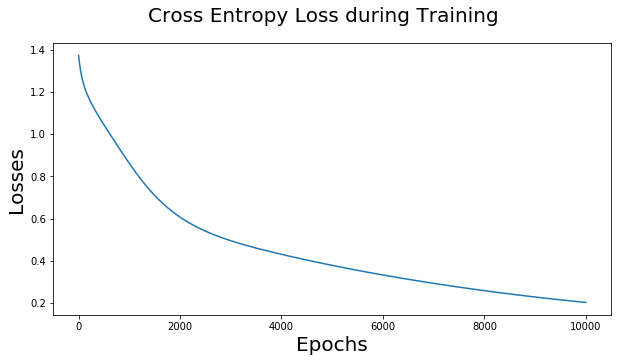

In [17]:
def experiment():
    ### WRITE YOUR CODE HERE - 10 MARKS
    # Load Iris Data
    X, t = loadIrisData()
    N_classes = np.max(t)+1
    t1hot = one_hot_encoding(t, N_classes)
    
    # Split into 20% Test Data, Normalize and One Hot
    X_train, t_train, X_test, t_test = splitData(X, t, testFraction=0.2)
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    t1hot_train = one_hot_encoding(t_train, N_classes)
    t1hot_test = one_hot_encoding(t_test, N_classes)
    
    # Create NN with 1 Hidden Layer
    ni = X.shape[1]            # 4
    nh = 4                     # This is a hyperparameter
    no = N_classes             # 3
    
    # Train NN with Train Data
    NN = NeuralNetwork(ni, nh, no)
    eta = 0.01
    epochs = 10000
    Epochs, Losses = NN.fit(X_train_normalized.T, t1hot_train.T, eta, epochs)
    
    # Plot Loss versus Epochs
    figure = plt.figure(figsize=(10, 5))
    plt.plot(Epochs, Losses)
    figure.suptitle('Cross Entropy Loss during Training', fontsize=20)
    plt.xlabel('Epochs', fontsize=20)
    plt.ylabel('Losses', fontsize=20)
    
    # Print Confusion matrix and Accuracy
    y_test = NN.predict_label(X_test_normalized.T)
    # print(t_test, y_test)
    confusion_matrix = getCM(y_test, t_test)
    print("Confusion Matrix : ") 
    print(confusion_matrix)
    print("Accuracy : ", getAccuracy(confusion_matrix))
        
if __name__=="__main__":
    experiment()